<a href="https://colab.research.google.com/github/expr01/SGD/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%ED%9A%8C%EA%B7%80_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# CSV 파일 로드
df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

# 타겟 데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0,
                         110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0,
                         188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0,
                         250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0,
                         700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# 다항식 변환
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 표준화
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [4]:
# SGDRegressor 모델 생성
sgd_regressor = SGDRegressor(loss = 'squared_error', random_state=42, max_iter=1, tol=1e-3)

# 하이퍼파라미터 설정
epochs = 10000
train_scores = []
test_scores = []
losses = []


# 에폭 반복하여 학습
for epoch in range(epochs):
    sgd_regressor.partial_fit(train_scaled, train_target)  # 부분적 적합
    train_score = sgd_regressor.score(train_scaled, train_target)
    test_score = sgd_regressor.score(test_scaled, test_target)

    # 손실 값 계산
    loss = np.mean((sgd_regressor.predict(train_scaled) - train_target) ** 2)  # MSE
    losses.append(loss)
    train_scores.append(train_score)
    test_scores.append(test_score)

        # 조기 종료 조건 확인
    if epoch > 0 and abs(losses[-1] - losses[-2]) < 1e-3:  # 손실 변화가 tol 이하일 때
        stopped_epoch = epoch
        print(f"Training stopped at epoch {stopped_epoch}")
        break

Training stopped at epoch 8540


Training score: 0.988973401571973
Test score: 0.9840347546336284


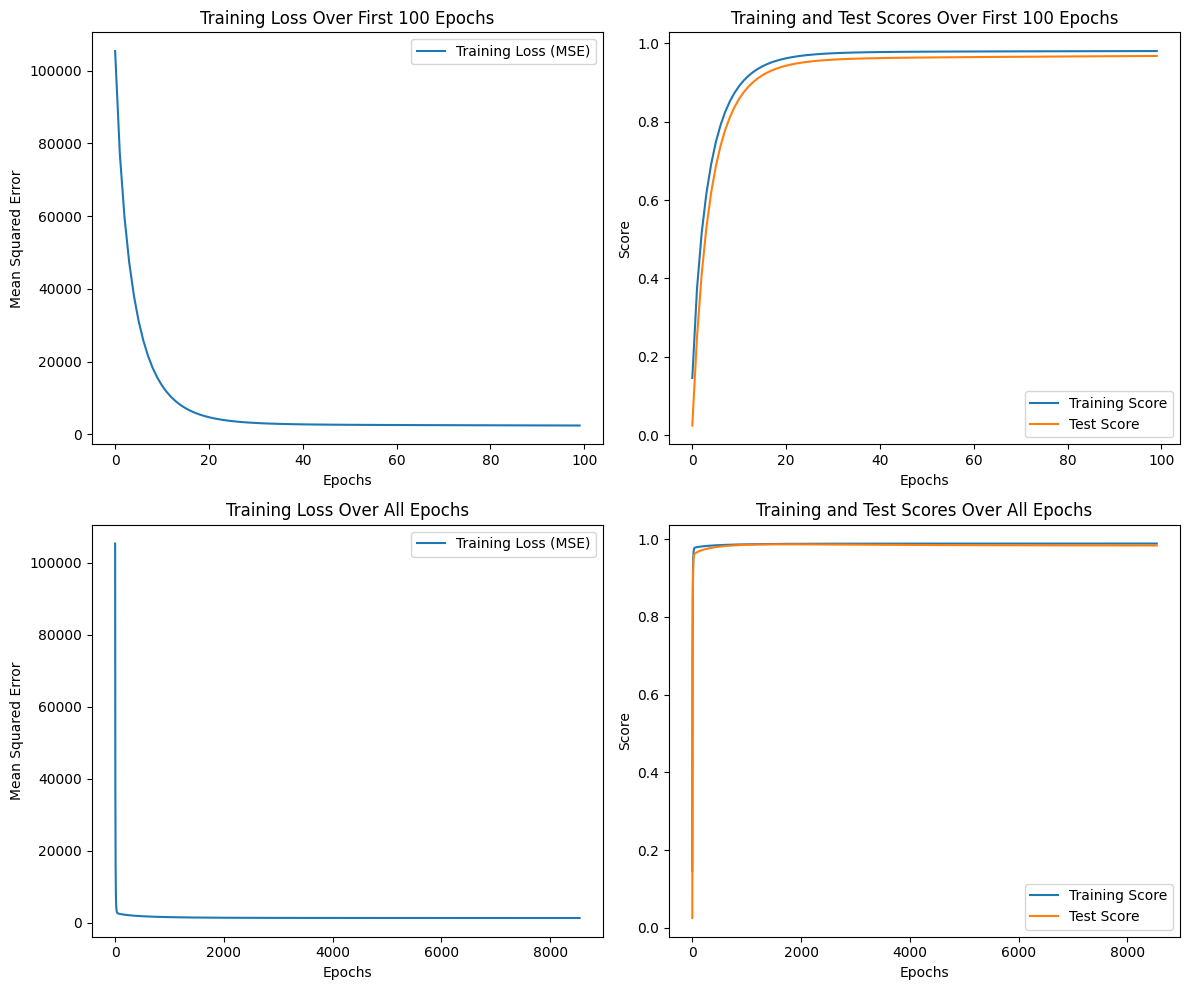

In [5]:
# 성능 평가
train_score = sgd_regressor.score(train_scaled, train_target)  # 훈련 세트 점수
test_score = sgd_regressor.score(test_scaled, test_target)     # 테스트 세트 점수

print(f'Training score: {train_score}')
print(f'Test score: {test_score}')

# 시각화
plt.figure(figsize=(12, 10))

# 1행 1열: 손실 함수 (에폭 100까지)
plt.subplot(2, 2, 1)
plt.plot(losses[:100], label='Training Loss (MSE)')
plt.title('Training Loss Over First 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# 1행 2열: 점수 (에폭 100까지)
plt.subplot(2, 2, 2)
plt.plot(train_scores[:100], label='Training Score')
plt.plot(test_scores[:100], label='Test Score')
plt.title('Training and Test Scores Over First 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()

# 2행 1열: 전체 손실 함수
plt.subplot(2, 2, 3)
plt.plot(losses, label='Training Loss (MSE)')
plt.title('Training Loss Over All Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# 2행 2열: 전체 점수
plt.subplot(2, 2, 4)
plt.plot(train_scores, label='Training Score')
plt.plot(test_scores, label='Test Score')
plt.title('Training and Test Scores Over All Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()

plt.tight_layout() # 플롯 사이 자동 간격 조정
plt.show()